In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
def encode_image(image):
    encoded_data = []
    i = 0
    n = len(image)

    while i < n:
        current_pixel = image[i]
        run_length = 1
        
        while i + run_length < n and image[i + run_length] == current_pixel:
            run_length += 1

        if run_length >= 3:  # Codage de répétition
            code = (0x8000 | run_length, current_pixel)
            encoded_data.append(code)
            i += run_length
        else:  # Codage de séquence unique
            seq_length = 0
            sequence = []

            while i < n and (seq_length < 3 or (i + 1 < n and image[i] != image[i + 1])):
                sequence.append(image[i])
                i += 1
                seq_length += 1

            code = (seq_length, sequence)
            encoded_data.append(code)

    return encoded_data

def save_encoded_image(encoded_data, filename):
    with open(filename, 'wb') as f:
        for item in encoded_data:
            if isinstance(item[1], list):  # Séquence unique
                f.write(item[0].to_bytes(2, byteorder='big'))
                f.write(bytes(item[1]))
            else:  # Répétition
                f.write(item[0].to_bytes(2, byteorder='big'))
                f.write(item[1].to_bytes(1, byteorder='big'))
    print(f"Image compressée sauvegardée dans '{filename}'.")

def calculate_compression_rate(original_image, encoded_data):
    original_size = len(original_image)
    compressed_size = sum(2 + (1 if not isinstance(code[1], list) else len(code[1])) for code in encoded_data)
    compression_rate = original_size / compressed_size
    print(f"Taille d'origine : {original_size} octets")
    print(f"Taille compressée : {compressed_size} octets")
    print(f"Taux de compression : {compression_rate:.2f}")
    return compression_rate

print("Fonctions de compression et taux de compression définies.")


Fonctions de compression et taux de compression définies.


In [12]:
def decode_image(filename):
    image = []
    with open(filename, 'rb') as f:
        while True:
            header = f.read(2)
            if not header:
                break
            flag_and_length = int.from_bytes(header, byteorder='big')
            length = flag_and_length & 0x7FFF
            is_repetition = (flag_and_length & 0x8000) != 0
            
            if is_repetition:
                pixel_value = int.from_bytes(f.read(1), byteorder='big')
                image.extend([pixel_value] * length)
            else:
                image.extend(f.read(length))
                
    print(f"Image décompressée à partir de '{filename}'.")
    return image

def display_image(image_data, width, height):
    image_array = np.array(image_data).reshape((height, width))
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
    plt.show()
    print("Image affichée.")

print("Fonctions de décompression et d'affichage définies.")


Fonctions de décompression et d'affichage définies.


In [13]:
# Exemple d'image 6x6
original_image = [
    0, 255, 0, 255, 0, 255,
    255, 255, 255, 255, 255, 255,
    0, 0, 0, 0, 0, 0,
    255, 255, 255, 255, 255, 255,
    0, 255, 0, 255, 0, 255,
    255, 255, 255, 255, 255, 255
]
print("Image d'origine :")
print(original_image)

# Compression de l'image
encoded_data = encode_image(original_image)
save_encoded_image(encoded_data, 'compressed_image.rle')
compression_rate = calculate_compression_rate(original_image, encoded_data)


Image d'origine :
[0, 255, 0, 255, 0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 255, 0, 255, 0, 255, 255, 255, 255, 255, 255, 255]
Image compressée sauvegardée dans 'compressed_image.rle'.
Taille d'origine : 36 octets
Taille compressée : 26 octets
Taux de compression : 1.38


Image décompressée à partir de 'compressed_image.rle'.
Image décodée :
[0, 255, 0, 255, 0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 255, 0, 255, 0, 255, 255, 255, 255, 255, 255, 255]


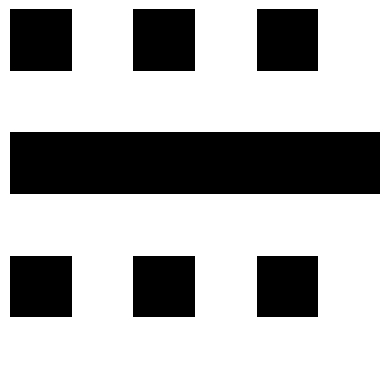

Image affichée.


In [14]:
decoded_image = decode_image('compressed_image.rle')
print("Image décodée :")
print(decoded_image)

# Afficher l'image
display_image(decoded_image, width=6, height=6)
